In [ ]:
%matplotlib inline
bs = 32

In [ ]:
!pip install -Uqq fastai fastbook nbdev ddgs==9.5.4

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 25.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.3/70.3 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.6/68.6 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 80.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 65.9 MB/s eta 0:00:00


In [ ]:
from fastai import *
from fastbook import *
from fastai.vision.all import *

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/My Drive/yoga_pose_recognizer

/content/drive/My Drive/yoga_pose_recognizer


In [ ]:
pose_labels = [
    "Mountain Pose yoga",
    "Tree Pose yoga",
    "Warrior 1 Pose yoga",
    "Warrior 2 Pose yoga",
    "Downward Dog Pose yoga",
    "Cobra Pose yoga",
    "Bridge Pose yoga",
    "Triangle Pose yoga",
    "Boat Pose yoga",
    "Chair Pose yoga",
    "Child Pose yoga"
]
len(pose_labels)

11

In [ ]:
from ddgs import DDGS
import time

def DDG_search_images(term, min_images=200):
  """
  term: term we are searching for
  min_images: minimum number of images to be downloaded
  """
  results = []
  for page_no in range(1, 50): # continue to traverse pages until we get the target no of images
    responses = DDGS().images(
        query=term,
        region="us-en",
        safesearch="off",
        timelimit="y",
        max_results=min_images,
        page = page_no,
        backend="auto",
    )
    results.extend(responses)
    if len(results) >= min_images: break

  image_urls = [result['image'] for result in results]
  return image_urls

In [ ]:
images = DDG_search_images(pose_labels[0])
f"No of Images => {len(images)} -- One Image URL => {images[0]}"

'No of Images => 247 -- One Image URL => https://gurukulyogashala.com/blog/wp-content/uploads/2024/06/01.png'

In [ ]:
doc(download_url)

In [ ]:
dest = "mountainpose.jpg"
download_url(images[0], dest, show_progress=False)

Path('mountainpose.jpg')

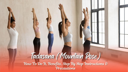

In [ ]:
image = Image.open(dest)
image.to_thumb(128, 128)

In [ ]:
from tqdm.notebook import tqdm # helps keep track of the progress

data_path = "data"
if not os.path.exists(data_path):
  os.mkdir(data_path)

for pose_type in tqdm(pose_labels):

  dest = f"{data_path}/{pose_type}"
  if not os.path.exists(dest):
    os.mkdir(dest)

  try:
    pose_image_urls = DDG_search_images(pose_type)
    download_images(dest, urls = pose_image_urls)

  except:
    continue

  0%|          | 0/11 [00:00<?, ?it/s]

In [ ]:
image_counts = get_image_files(data_path)
image_counts

(#3708) [Path('data/Mountain Pose yoga/56056d65-f5ac-4c4f-8fab-88035d0bfff0.jpg'),Path('data/Mountain Pose yoga/f82a89c4-1468-4332-b997-77f56b2c1c84.jpg'),Path('data/Mountain Pose yoga/eb0cdd81-263a-4dcc-a6e7-1d865a56ad95.jpg'),Path('data/Mountain Pose yoga/e102344f-8759-43b0-bb39-65c6d759ecce.png'),Path('data/Mountain Pose yoga/eacbaee6-be7e-4a64-ab5a-21f253188bd5.jpg'),Path('data/Mountain Pose yoga/0d977d57-7cb3-484f-aee3-f145909e1d7a.jpg'),Path('data/Mountain Pose yoga/a49925cb-05cf-44d5-924f-fa107f3c50c3.png'),Path('data/Mountain Pose yoga/c08dd1e2-cc83-4bea-b69d-e0d9c9f8057a.jpg'),Path('data/Mountain Pose yoga/2d07cd16-451b-4bdf-9645-12ba2cefb75c.jpg'),Path('data/Mountain Pose yoga/862969e8-dcfa-480c-abab-31241ba9667b.jpg'),Path('data/Mountain Pose yoga/86da5e4c-518c-4aa0-9c34-b99ba8473077.jpg'),Path('data/Mountain Pose yoga/313a8941-01ed-4edb-b810-863fe641c848.png'),Path('data/Mountain Pose yoga/6a85714a-48b5-4ec1-94d6-f72df8106153.png'),Path('data/Mountain Pose yoga/4dbf38d5-2bb

In [ ]:
failed = verify_images(image_counts)
failed

(#52) [Path('data/Tree Pose yoga/2759ffe5-bd6d-498c-a25e-4851b17473aa.jpg'),Path('data/Tree Pose yoga/f8616ac9-327a-47f3-b837-7bbde2a0f6e0.jpg'),Path('data/Warrior 2 Pose yoga/257f19b7-8621-42fb-9a01-cd860560f3f6.svg'),Path('data/Warrior 2 Pose yoga/dfcf1f9c-6e1c-4aa9-ba43-c79abacc08da.jpg'),Path('data/Warrior 2 Pose yoga/9a9196a9-8114-47b7-aa5c-5b335d15701e.jpg'),Path('data/Warrior 2 Pose yoga/90385e17-96d1-4d4e-b932-3578aca67372.jpg'),Path('data/Warrior 2 Pose yoga/4766f7d4-c700-4a11-aeec-ca7f3c03e42d.jpg'),Path('data/Warrior 2 Pose yoga/68cd565f-2484-411a-b523-b4ebf20cef4a.jpg'),Path('data/Warrior 2 Pose yoga/8809c383-9762-4316-ae86-1c04bd8a3f79.jpg'),Path('data/Warrior 2 Pose yoga/b2209e9b-2f3d-4472-8081-47b59bb28fe7.jpg'),Path('data/Warrior 2 Pose yoga/5ef59367-45b6-451e-a92b-fa0faee55c0f.jpg'),Path('data/Warrior 2 Pose yoga/d880b106-c4a7-445f-a42d-d0f4d77bf44f.jpg'),Path('data/Warrior 2 Pose yoga/354a5f82-80f0-4d22-a9be-2516d9b69cca.jpg'),Path('data/Warrior 2 Pose yoga/7620be34-1

In [ ]:
failed.map(Path.unlink)

(#52) [None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None...]

In [ ]:
doc(get_image_files)

In [ ]:
dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,                        # get_image_files returns a list of all images in that path recursively by default
    splitter=RandomSplitter(valid_pct=0.1, seed=42),  # getting 90-10 train-validation split
    get_y=parent_label,                               # taking the folder name as labels
    item_tfms=Resize(128))                            # resizing to get the image of same shape

In [ ]:
dls = dblock.dataloaders(data_path,bs=bs)             # setting up batch size for efficient GPU use

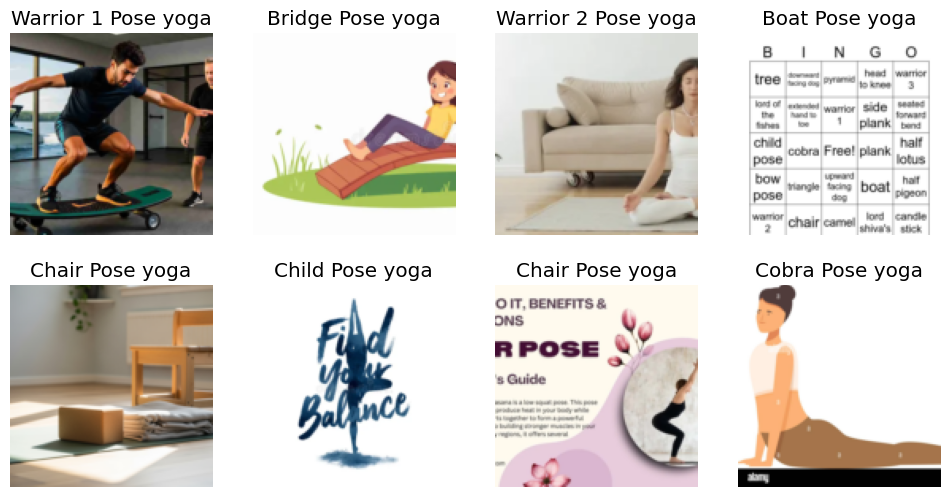

In [ ]:
dls.train.show_batch(max_n=8, nrows=2)

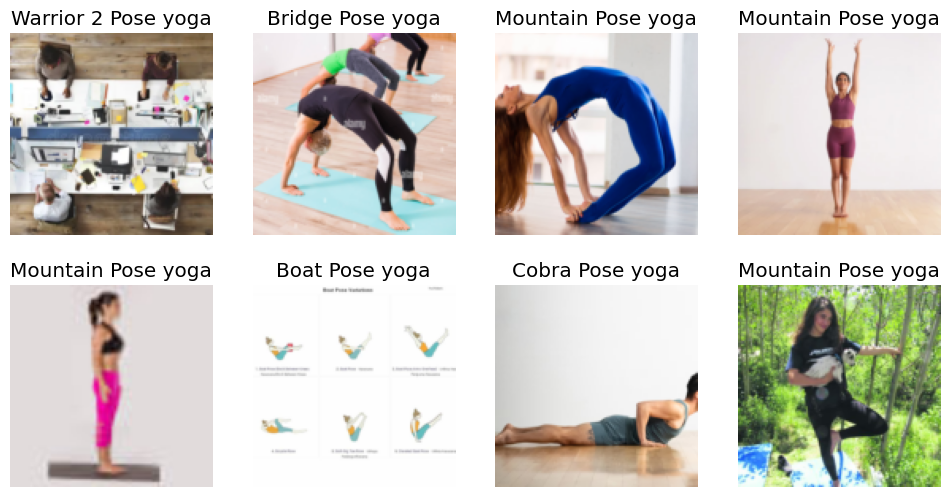

In [ ]:
dls.valid.show_batch(max_n=8, nrows=2)

/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


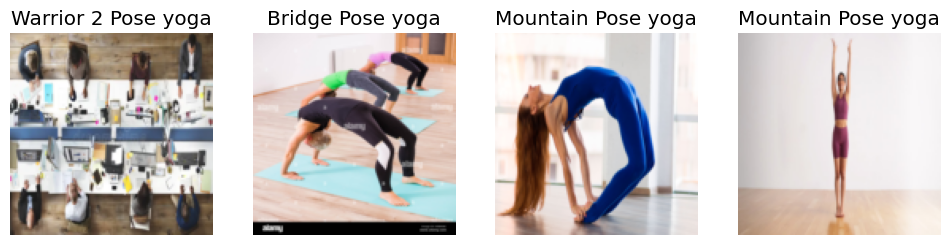

In [ ]:
dblock = dblock.new(item_tfms=Resize(128, ResizeMethod.Squish)) # Squishing the whole image into (128 x 128) size
dls = dblock.dataloaders(data_path)
dls.valid.show_batch(max_n=4, nrows=1)

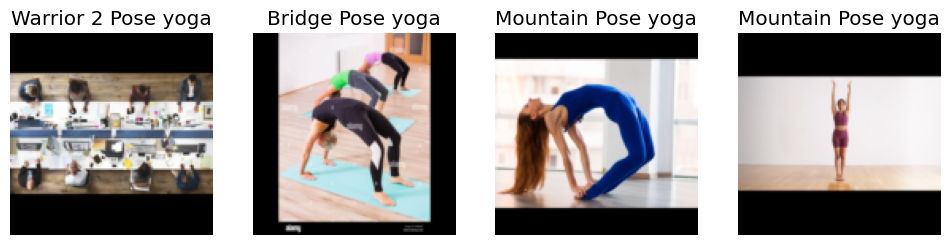

In [ ]:
dblock = dblock.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros')) # Padding the extra spaced the whole image into (128 x 128) size without squishing
dls = dblock.dataloaders(data_path)
dls.valid.show_batch(max_n=4, nrows=1)

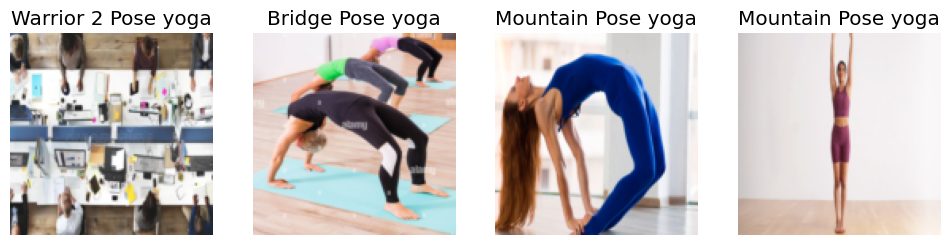

In [ ]:
dblock = dblock.new(item_tfms=RandomResizedCrop(128, min_scale=0.3)) # Randomly cropping, cutting, resizing, coloring parts of image into (128 x 128) size
dls = dblock.dataloaders(data_path)
dls.valid.show_batch(max_n=4, nrows=1)

In [ ]:
doc(aug_transforms)

,Type,Default,Details,
mult,float,1.0,"Multiplication applying to `max_rotate`,`max_lighting`,`max_warp`",
do_flip,bool,True,Random flipping,
flip_vert,bool,False,Flip vertically,
max_rotate,float,10.0,Maximum degree of rotation,
min_zoom,float,1.0,Minimum zoom,
max_zoom,float,1.1,Maximum zoom,
max_lighting,float,0.2,Maximum scale of changing brightness,
max_warp,float,0.2,Maximum value of changing warp per,
p_affine,float,0.75,Probability of applying affine transformation,
p_lighting,float,0.75,Probability of changing brightnest and contrast,


/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


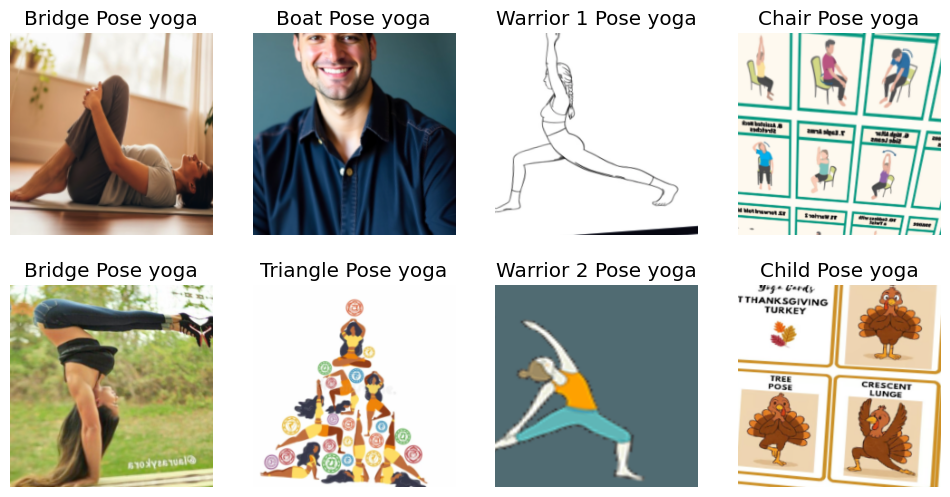

In [ ]:
# RandomResizedCrop crops images randomly and create copies so that we don't miss out anything
# aug_transforms is used for image data augmentation
dblock = dblock.new(item_tfms=RandomResizedCrop(224, min_scale=0.5), batch_tfms=aug_transforms())
dls = dblock.dataloaders(data_path)
dls.train.show_batch(max_n=8, nrows=2)

In [ ]:
torch.save(dls, "yoga_pose_dataloader_v0.pkl")